In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw9.ipynb")

# Homework 9: Gradient Descent

## Due Date:  Thursday July 29th, 11:59 PM

## This Assignment

In this assignment, we will implement gradient descent and show how it can be used to minimize (differentiable) loss functions (even loss functions for non-linear models). We will also compare/contrast the different variants of gradient descent.


Note that the first part of this assignment will use bold notation to represent vectors, i.e. $\mathbf{x}$.

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the assignment, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** in the cell below.

**Collaborators:** ...

## Point Distribution
| Question | Points | 
|----------|--------|
| 1 | 1 |
| 2 | 4 |
| 3a | 2 |
| 3b | 2 |
| 3c | 2 |
| 3d | 2 |
| Total | 13 | 

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import re
import seaborn as sns
import sklearn
import sklearn.datasets
import sklearn.linear_model

np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")

# Set some parameters
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 16
np.set_printoptions(4)

# We will use plot_3d helper function to help us visualize gradients
from hw9_utils import plot_3d

%matplotlib inline

### Load Data
For this homework, we will be using a toy dataset. Here, we load the data into a pandas dataframe. Note that we are reading the data directly from the URL address.

In [3]:
# Run this cell to load our sample data
part_1_data = pd.read_csv("https://github.com/DS-100/su20/raw/gh-pages/resources/assets/datasets/hw7_data.csv", index_col=0)
part_1_data.head()

,x,y
0,-5.000000,-7.672309
1,-4.966555,-7.779735
2,-4.933110,-7.995938
3,-4.899666,-8.197059
4,-4.866221,-8.183883


### A Simple Model

Let's start by examining our data and creating a simple model that can represent this data.

First, run the cell below to visualize our data.

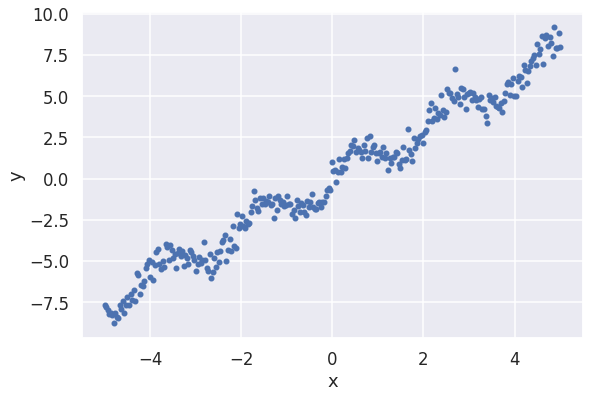

In [4]:
def scatter(x, y):
    """
    Generate a scatter plot using x and y

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, marker='.')
    plt.xlabel('x')
    plt.ylabel('y')
    
x = part_1_data['x']
y = part_1_data['y']
scatter(x,y)

The data looks roughly linear, with some extra sinusoidal noise. For now, let's assume that the data follows some underlying linear model. We define the underlying linear model that predicts the value $y$ using the value $x$ as: $y = f_{\theta^*}(x) = \theta^* \cdot x$

Since we cannot find the value of the population parameter $\theta^*$ exactly, we will assume that our dataset approximates our population and use our dataset to estimate $\theta^*$. We denote an estimate with $\theta$ and the fitted estimate chosen based on the data (i.e. the optimal choice of $\theta$ based on our dataset) as $\hat{\theta}$. Our parameterized model is:

$$\Large
f_{\theta}(x) = \theta \cdot x
$$

Based on this equation, we will define the linear model function `linear_model` below to estimate $\textbf{y}$ (the $y$-values) given $\textbf{x}$ (the $x$-values) and $\theta$.

In [5]:
def linear_model(x, theta):
    """
    Returns the estimate of y given x and theta

    Keyword arguments:
    x -- the vector of values x
    theta -- the scalar theta
    """
    return theta * x

Let's use squared loss to evaluate our estimate $\theta$, which we will use later to identify an optimal $\theta$, denoted $\hat{\theta}$. Given observations $y$ and their corresponding predictions $\hat{y}$, we can compute the average loss:

In [6]:
def average_squared_loss(y, y_hat):
    """
    Returns the averge squared loss for observations y and predictions y_hat.

    Keyword arguments:
    y -- the vector of true values y
    y_hat -- the vector of predicted values y_hat
    """
    return np.mean((y - y_hat) ** 2)

Finally, we will visualize the average squared loss as a function of $\theta$, where several different values of $\theta$ are given.

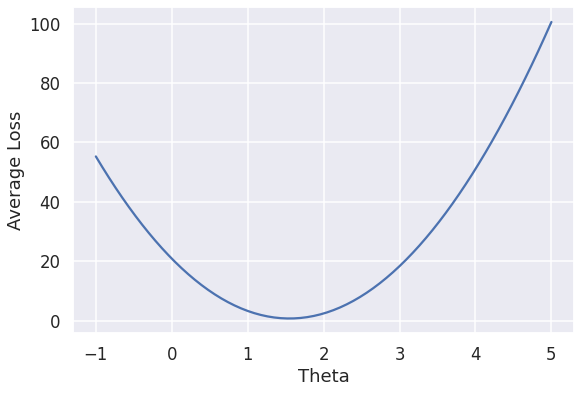

In [7]:
def visualize(x, y, thetas):
    """
    Plots the average l2 loss for given x, y as a function of theta.
    Use the functions you wrote for linear_model and l2_loss.

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    thetas -- an array containing different estimates of the scalar theta
    """ 
    avg_loss = np.array([average_squared_loss(linear_model(x, theta), y) for theta in thetas])
    plt.figure(figsize=(8,6))
    plt.plot(thetas, avg_loss)
    plt.xlabel("Theta")
    plt.ylabel("Average Loss")
    
thetas = np.linspace(-1, 5, 70)
visualize(x, y, thetas)

You should notice that $\hat{\theta}$ is approximately 1.5. 

### Fitting our Simple Model

Now that we have defined a simple linear model and loss function, let's begin working on fitting our model to the data.

### Question 1
Let's confirm our visual findings for the optimal $\hat{\theta}$.

Recall from Homework 6 that the analytical solution for the optimal $\hat{\theta}$ for the average squared loss is: 

$$\hat{\theta} = \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2}$$

Now that we have the analytic solution for $\hat{\theta}$, implement the function `find_theta` that calculates the numerical value of $\hat{\theta}$ based on our data $\textbf{x}$, $\textbf{y}$.

<!--
BEGIN QUESTION
name: q1
points: 1
-->

In [8]:
def find_theta(x, y):
    """
    Find optimal theta given x and y

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    """
    return sum(x * y) / sum(x**2)

theta_hat_simple = find_theta(x, y)
print(f'theta_hat = {theta_hat_simple}')

theta_hat = 1.5502648085962218


In [9]:
grader.check("q1")

q1 results: All test cases passed!

Now, let's plot our loss function again using the `visualize` function. But this time, we will add a vertical line at the optimal value of theta (plot the line $\theta = \hat{\theta}$).

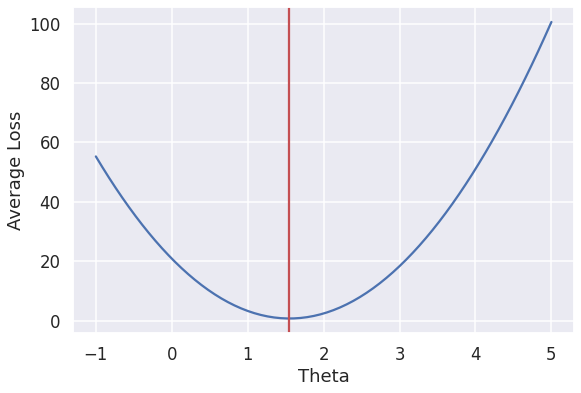

In [10]:
theta_opt = find_theta(x, y)
visualize(x, y, thetas)
plt.axvline(x=theta_opt, color='r');

We now have an optimal value for $\theta$ that minimizes the loss function on our dataset. We can use the scatter plot of the data and add the line $f_{\hat{\theta}}(x) = \hat{\theta} \cdot \textbf{x}$ using the $\hat{\theta}$ computed above.

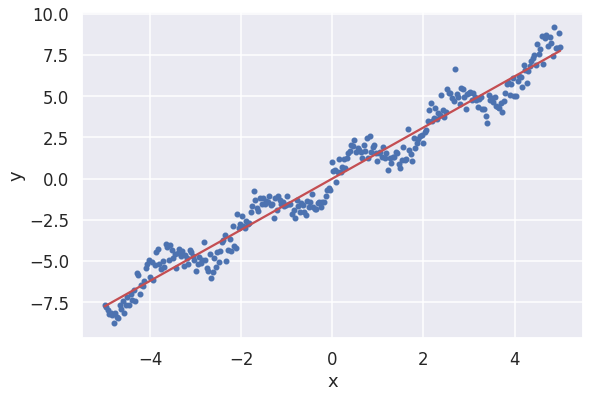

In [11]:
theta_opt_2 = find_theta(x, y)
scatter(x, y)
line_values = linear_model(x, theta_opt_2)
plt.plot(x, line_values, color='r');

Great! It looks like our model $f_{\hat{\theta}}(x)$ is able to capture the linear trend in our data quite well using a single parameter $\theta$. 

The difference between the true $y$'s and the predictions is known as the residual, $\textbf{r}=\textbf{y}-\hat{\theta} \cdot \textbf{x}$. Below, we find the residual and plot the residuals corresponding to $x$ in a scatter plot. We also plot a horizontal line at $y=0$ to assist visualization.

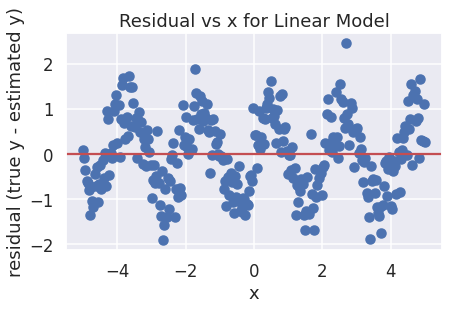

In [12]:
def visualize_residual(x, y):
    """
    Plot a scatter plot of the residuals, the remaining 
    values after removing the linear model from our data.

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    """
    ...
    theta_hat = find_theta(x, y)
    y_sin = y - linear_model(x, theta_hat)
    plt.scatter(x, y_sin)
    plt.xlabel('x')
    plt.ylabel('residual (true y - estimated y)')
    plt.title('Residual vs x for Linear Model')
    plt.axhline(y=0, color='r')

visualize_residual(x, y)

### Question 2: Increasing Model Complexity

It looks like the residual follows a sinusoidal pattern, meaning our original data may have (in addition to the linear component) a sinusoidal component. Let's define a new model to address this discovery and find optimal parameters to best fit the data:

$$\Large
f_\boldsymbol\theta(x) = \theta_1x + sin(\theta_2x)
$$

Now, our model is parameterized by both $\theta_1$ and $\theta_2$, which we can represent in the vector, $\boldsymbol{\theta}$.

Note that a general sine function $a\sin(bx+c)$ has three parameters: amplitude scaling parameter $a$, frequency parameter $b$ and phase shifting parameter $c$. Looking at the residual plot above, it looks like the residual is zero at x = 0, and the residual swings between -1 and 1. Thus, it seems reasonable to effectively set the scaling and phase shifting parameter ($a$ and $c$ in this case) to 1 and 0 respectively. While we could try to fit $a$ and $c$, we're unlikely to get much benefit. When you're done with this assignment, you can try adding $a$ and $c$ to our model and fitting these parameters to see if you can get a better loss.

We define the `sin_model` function below that predicts $\textbf{y}$ (the $y$-values) using $\textbf{x}$ (the $x$-values) based on our new equation.

In [13]:
def sin_model(x, theta):
    """
    Predict the estimate of y given x, theta_1, theta_2

    Keyword arguments:
    x -- the vector of values x
    theta -- a vector of length 2, where theta[0] = theta_1 and theta[1] = theta_2
    """
    theta_1 = theta[0]
    theta_2 = theta[1]
    return theta_1 * x + np.sin(theta_2 * x)

Recall $\hat{\theta}$ is the value of $\theta$ that minimizes our loss function. One way of solving for $\hat{\theta}$ is by taking the derivative of our loss function with respect to $\theta$, like we did in HW 6.  

Write/derive the expressions for following values and use them to fill in the functions below.

* $L(\textbf{x}, \textbf{y}, \theta_1, \theta_2)$: our loss function, the mean squared error
* $\frac{\partial L }{\partial \theta_1}$: the partial derivative of $L$ with respect to $\theta_1$
* $\frac{\partial L }{\partial \theta_2}$: the partial derivative of $L$ with respect to $\theta_2$

Recall that $L(\textbf{x}, \textbf{y}, \theta_1, \theta_2) = \frac{1}{n} \sum_{i=1}^{n} (\textbf{y}_i - \hat{\textbf{y}}_i)^2$

Specifically, the functions `sin_MSE`, `sin_MSE_dt1` and `sin_MSE_dt2` should compute $R$, $\frac{\partial R }{\partial \theta_1}$ and $\frac{\partial R }{\partial \theta_2}$ respectively. Use the expressions you wrote for $\frac{\partial R }{\partial \theta_1}$ and $\frac{\partial R }{\partial \theta_2}$ to implement these functions. In the functions below, the parameter `theta` is a vector that looks like $\begin{bmatrix} \theta_1 \\ \theta_2 \end{bmatrix}$. We have completed `sin_MSE_gradient`, which calls `dt1` and `dt2` and returns the gradient `dt` for you.

Notes: 
* Keep in mind that we are still working with our original set of data, `part_1_data`.
* To keep your code a bit more concise, be aware that `np.mean` does the same thing as `np.sum` divided by the length of the numpy array.
* Another way to keep your code more concise is to use the function `sin_model` we defined which computes the output of the model.

<!--
BEGIN QUESTION
name: q2
points: 4
-->

In [14]:
def sin_MSE(theta, x, y):
    """
    Compute the numerical value of the l2 loss of our sinusoidal model given theta

    Keyword arguments:
    theta -- the vector of values theta
    x     -- the vector of x values
    y     -- the vector of y values
    """
    return np.mean((sin_model(x, theta) - y)**2)

def sin_MSE_dt1(theta, x, y):
    """
    Compute the numerical value of the partial of l2 loss with respect to theta_1

    Keyword arguments:
    theta -- the vector of values theta
    x     -- the vector of x values
    y     -- the vector of y values
    """
    return np.mean(2 * (sin_model(x, theta) - y) * x)
    
def sin_MSE_dt2(theta, x, y):
    """
    Compute the numerical value of the partial of l2 loss with respect to theta_2

    Keyword arguments:
    theta -- the vector of values theta
    x     -- the vector of x values
    y     -- the vector of y values
    """
    theta1 = theta[0]
    theta2 = theta[1]
    return np.mean(2 * (sin_model(x, theta) - y) * x * np.cos(theta2 * x))
    
# This function calls dt1 and dt2 and returns the gradient dt. It is already implemented for you.
def sin_MSE_gradient(theta, x, y):
    """
    Returns the gradient of l2 loss with respect to vector theta

    Keyword arguments:
    theta -- the vector of values theta
    x     -- the vector of x values
    y     -- the vector of y values
    """
    return np.array([sin_MSE_dt1(theta, x, y), sin_MSE_dt2(theta, x, y)])

In [15]:
grader.check("q2")

q2 results: All test cases passed!

### Question 3: Gradient Descent

In lecture, we saw that there are a number of ways to optimize a linear model:

1. Brute force guess and check
2. Analytically derive a closed form solution (like finding $\hat{\theta}$ by taking the derivative of the loss w.r.t. its parameters, as in HW 6)
3. Use a numerical method like gradient descent

You can try to solve for the optimal $\hat{\mathbf{\theta}}$ analytically using your answers from 2a, but we don't recommend it (the math is really messy). Additionally, observe that the model is not even linear since it contains $\theta_2$ inside a sine function. This means we cannot even set up the normal equations to solve for $\hat{\theta}$.

To demonstrate how truly powerful techniques like gradient descent are, we'll use it in this assignment to optimize our nonlinear model.

Let's now implement gradient descent. 

Note that the function you're implementing here is somewhat different than the gradient descent function we created in lecture. The version in lecture was `gradient_descent(df, initial_guess, alpha, n)`, where `df` was the gradient of the function we are minimizing and `initial_guess` are the starting parameters for that function. Here our signature is a bit different (described below).

### Question 3a

Implement the `grad_desc` function that performs gradient descent for a finite number of iterations. This function takes in a loss function, the gradient of the loss function, an initial value for $\theta$ (`theta`), and a dataframe containing the $\textbf{x}$ and $\textbf{y}$ values (`data`). `alpha` will be the learning rate (or step size, whichever term you prefer). In this part, we'll use a static learning rate (i.e. the same learning rate at every time step), just like in lecture.

At each time step, use the gradient and `alpha` to update your current `theta`. Also at each time step, be sure to save the current `theta` in `theta_history`, along with the average squared loss (computed with the current `theta`) in `loss_history`.

Recall that the gradient descent update function follows the form:

$$\Large
\boldsymbol\theta^{(t+1)} \leftarrow \boldsymbol\theta^{(t)} - \alpha \left ( \frac{1}{n} \sum_{i=1}^{n} \nabla_\boldsymbol\theta \mathbf{L}(\textbf{x}_i, \textbf{y}_i, \boldsymbol\theta^{(t)}) \right )
$$

where $\boldsymbol \theta$ is the parameter being optimized, $\alpha$ is the learning rate, $\nabla_\boldsymbol\theta \mathbf{L}$ is the gradient of the loss function with respect to $\boldsymbol \theta$, and $t$ is the optimization step counter (that is, $\boldsymbol \theta ^{(t)}$ is the value of $\boldsymbol \theta$ after $t$ steps of gradient descent).

After completing the function, the cell will output the trajectory from running gradient descent over time.

Hints:
- Write out the gradient update equation (1 step). What variables will you need for each gradient update? Of these variables, which ones do you already have, and which ones will you need to recompute at each time step?
- You may need a loop here to update `theta` several times. Take a look at `num_iter`.
- Be sure to include the initial theta and loss into the trajectory because the test checks for this.
- Don't forget that `sin_MSE` and `sin_MSE_gradient` require the $x$ and $y$ values to be supplied.

<!--
BEGIN QUESTION
name: q3a
points: 2
-->

In [16]:
def init_theta():
    """Creates an initial theta [0, 0] of shape (2,) as a starting point for gradient descent"""
    return np.zeros((2,))

def grad_desc(loss_f, gradient_loss_f, theta, data, num_iter=20, alpha=0.1):
    """
    Run gradient descent update for a finite number of iterations and static learning rate

    Keyword arguments:
    loss_f -- the loss function to be minimized (used for computing loss_history)
    gradient_loss_f -- the gradient of the loss function to be minimized
    theta -- the vector of values theta to use at first iteration
    data -- the data used in the model 
    num_iter -- the max number of iterations
    alpha -- the learning rate (also called the step size)
    
    Return:
    theta -- the optimal value of theta after num_iter of gradient descent
    theta_history -- the series of theta values over each iteration of gradient descent
    loss_history -- the series of loss values over each iteration of gradient descent
    """
    theta_history = []
    loss_history = []
    for i in range(num_iter + 1):
        theta_history.append(theta)
        loss_history.append(loss_f(theta, data.iloc[:, 0], data.iloc[:, 1]))
        grad = gradient_loss_f(theta, data.iloc[:, 0], data.iloc[:, 1])
        theta = theta - alpha * grad
    return theta, theta_history, loss_history

theta_start = init_theta()
theta_hat, thetas_used, losses_calculated = grad_desc(
    sin_MSE, sin_MSE_gradient, theta_start, part_1_data, num_iter=20, alpha=0.1
)
for b, l in zip(thetas_used, losses_calculated):
    print(f"theta: {b}, Loss: {l}")

theta: [0. 0.], Loss: 20.859191416422235
theta: [2.6011 2.6011], Loss: 9.285008173048666
theta: [0.9034 2.591 ], Loss: 4.680169273815357
theta: [2.0563 2.9631], Loss: 2.6242517936325833
theta: [1.1589 2.8669], Loss: 1.4765157174727774
theta: [1.7939 3.0728], Loss: 0.9073271435862448
theta: [1.3216 3.0015], Loss: 0.541531643291128
theta: [1.6495 3.0291], Loss: 0.3775841142469479
theta: [1.4233 2.9882], Loss: 0.2969750688130759
theta: [1.583  3.0103], Loss: 0.2590425421375732
theta: [1.471  2.9893], Loss: 0.23973439443291833
theta: [1.5504 3.0017], Loss: 0.23034782416254634
theta: [1.4944 2.9914], Loss: 0.2255775832667724
theta: [1.5342 2.998 ], Loss: 0.22321772191904068
theta: [1.506  2.9929], Loss: 0.22202363967204045
theta: [1.526  2.9963], Loss: 0.22142811500262397
theta: [1.5119 2.9938], Loss: 0.22112776381775168
theta: [1.5219 2.9955], Loss: 0.22097741373654575
theta: [1.5148 2.9942], Loss: 0.22090173185683037
theta: [1.5198 2.9951], Loss: 0.2208637810584589
theta: [1.5163 2.9945],

In [17]:
grader.check("q3a")

q3a results: All test cases passed!

### Question 3b
Now, let's try using a decaying learning rate. Implement `grad_desc_decay` below, which performs gradient descent with a learning rate that decreases slightly with each time step. You should be able to copy most of your work from the previous part, but you'll need to tweak how you update `theta` at each time step.

By decaying learning rate, we mean instead of just a number $\alpha$, the learning should be now $\frac{\alpha}{t+1}$ where $t$ is the number of the current iteration of gradient descent. (Why do we need to add a '+ 1' in the denominator?)

**Note:** Be sure to include the initial theta and loss into the trajectory because the test checks for this.

<!--
BEGIN QUESTION
name: q3b
points: 2
-->

In [18]:
def grad_desc_decay(loss_f, gradient_loss_f, theta, data, num_iter=20, alpha=0.1):
    """
    Run gradient descent update for a finite number of iterations and decaying learning rate

    Keyword arguments:
    loss_f -- the loss function to be minimized (used for computing loss_history)
    gradient_loss_f -- the gradient of the loss function to be minimized
    theta -- the vector of values theta to use at first iteration
    data -- the data used in the model 
    num_iter -- the max number of iterations
    alpha -- the learning rate (also called the step size)
    
    Return:
    theta -- the optimal value of theta after num_iter of gradient descent
    theta_history -- the series of theta values over each iteration of gradient descent,
                     should include the starting and ending theta (i.e. num_iter + 1 items)
    loss_history -- the series of loss values over each iteration of gradient descent, 
                     should include the starting and ending theta (i.e. num_iter + 1 items)
    """
    theta_history = []
    loss_history = []
    for i in range(num_iter + 1):
        theta_history.append(theta)
        loss_history.append(loss_f(theta, data.iloc[:, 0],data.iloc[:, 1]))
        grad = gradient_loss_f(theta,data.iloc[:, 0],data.iloc[:, 1])
        theta = theta - alpha / (1 + i) * grad
    return theta, theta_history, loss_history

theta_start = init_theta()
theta_hat_decay, thetas_used_decay, losses_calculated_decay = grad_desc_decay(
    sin_MSE, sin_MSE_gradient, theta_start, part_1_data, num_iter=20, alpha=0.1
)
for b, l in zip(thetas_used_decay, losses_calculated_decay):
    print(f"theta: {b}, Loss: {l}")

theta: [0. 0.], Loss: 20.859191416422235
theta: [2.6011 2.6011], Loss: 9.285008173048666
theta: [1.7522 2.596 ], Loss: 0.9288337694245619
theta: [1.6615 2.6585], Loss: 0.6305856872695184
theta: [1.6273 2.7024], Loss: 0.5179242520135392
theta: [1.6087 2.7343], Loss: 0.45363771946941295
theta: [1.5965 2.7586], Loss: 0.41142903882132165
theta: [1.5877 2.7778], Loss: 0.38153256869715285
theta: [1.5811 2.7934], Loss: 0.35926368186605534
theta: [1.5757 2.8064], Loss: 0.3420565889244843
theta: [1.5714 2.8174], Loss: 0.3283808643419035
theta: [1.5677 2.8269], Loss: 0.3172655544970414
theta: [1.5646 2.8352], Loss: 0.30806465582511794
theta: [1.5619 2.8425], Loss: 0.30033167881868705
theta: [1.5595 2.849 ], Loss: 0.2937482120787368
theta: [1.5575 2.8549], Loss: 0.2880811398950521
theta: [1.5556 2.8602], Loss: 0.2831559330512718
theta: [1.5539 2.865 ], Loss: 0.27883937959562793
theta: [1.5524 2.8693], Loss: 0.2750280789874102
theta: [1.551  2.8734], Loss: 0.2716405740106779
theta: [1.5498 2.8771]

In [19]:
grader.check("q3b")

q3b results: All test cases passed!

### Question 3c
Now, let's try implementing stochastic gradient descent. Implement `stoch_grad_desc` below, which performs stochastic gradient descent. You should be able to copy most of your work from Question 3a. We will be using a static learning rate and a argument `batch_size` to represent the size of the mini-batch to sample for each iteration.

Recall that for a mini-batch of the data with size $b$, the stochastic gradient descent update rule is

$$\Large \theta^{(t+1)} \leftarrow \theta^{(t)} - \alpha \left ( \frac{1}{b} \sum_{i=1}^{b} \nabla_\boldsymbol\theta \mathbf{L}(\textbf{x}_i, \textbf{y}_i, \boldsymbol\theta^{(t)}) \right )$$


where $\mathbf{L}$ is the loss function, and $\textbf{x}_i$ and $\textbf{y}_i$ are the $i^\text{th}$ values in $\textbf{x}$ and $\textbf{y}$, respectively.

**Note:** In the update rule above, $b$ is much smaller than $n$, the total size of the data.

**Note:** Be sure to include the initial theta and loss into the trajectory because the test checks for this.

<!--
BEGIN QUESTION
name: q8c
points: 2
-->

In [20]:
def stoch_grad_desc(loss_f, gradient_loss_f, theta, data, batch_size, num_iter=20, alpha=0.1, seed=42):
    """
    Run stochastic gradient descent update for a finite number of iterations

    Keyword arguments:
    loss_f -- the loss function to be minimized (used for computing loss_history)
    gradient_loss_f -- the gradient of the loss function to be minimized
    theta -- the vector of values theta to use at first iteration
    data -- the data used in the model 
    num_iter -- the max number of iterations
    alpha -- the learning rate (also called the step size)
    
    Return:
    theta -- the optimal value of theta after num_iter of gradient descent
    theta_history -- the series of theta values over each iteration of gradient descent,
                     should include the starting and ending theta (i.e. num_iter + 1 items)
    loss_history -- the series of loss values over each iteration of gradient descent, 
                     should include the starting and ending theta (i.e. num_iter + 1 items)
    """
    np.random.seed(seed) # do not change this line
    theta_history = []
    loss_history = []
    samp = data.sample(batch_size)
    for i in range(num_iter + 1):
        theta_history.append(theta)
        loss = loss_f(theta, samp.iloc[:, 0], samp.iloc[:, 1])
        loss_history.append(loss)
        grad = gradient_loss_f(theta, samp.iloc[:, 0], samp.iloc[:, 1])
        theta = theta - alpha * grad
    return theta, theta_history, loss_history

theta_start = init_theta()
theta_hat_stoch, thetas_used_stoch, losses_calculated_stoch = stoch_grad_desc(
    sin_MSE, sin_MSE_gradient, theta_start, part_1_data, 50, num_iter=20, alpha=0.1
)
for b, l in zip(thetas_used_stoch, losses_calculated_stoch):
    print(f"theta: {b}, Loss: {l}")

theta: [0. 0.], Loss: 23.225275589454824
theta: [2.7915 2.7915], Loss: 13.217123172563852
theta: [0.6846 2.3515], Loss: 9.6766816239542
theta: [2.3875 2.5871], Loss: 5.666574220018824
theta: [1.0842 2.4495], Loss: 3.950695163540908
theta: [2.0805 2.8439], Loss: 2.6410415511743977
theta: [1.1743 2.7374], Loss: 1.835395019347043
theta: [1.8769 3.129 ], Loss: 1.203697654843369
theta: [1.3073 3.1376], Loss: 0.765363496473952
theta: [1.7205 2.9555], Loss: 0.4832018446589088
theta: [1.4039 2.9479], Loss: 0.3460254882983078
theta: [1.633  2.9909], Loss: 0.27331527758662394
theta: [1.4637 2.9803], Loss: 0.23333620795915627
theta: [1.5863 2.986 ], Loss: 0.21257482724559157
theta: [1.4976 2.98  ], Loss: 0.2016535857917793
theta: [1.5619 2.9835], Loss: 0.19595358031965715
theta: [1.5153 2.9803], Loss: 0.19295325122703916
theta: [1.5491 2.9823], Loss: 0.19138229121155942
theta: [1.5246 2.9807], Loss: 0.1905558152249327
theta: [1.5424 2.9818], Loss: 0.19012234364794442
theta: [1.5295 2.9809], Loss:

In [21]:
grader.check("q8c")

q8c results: All test cases passed!

Let's visually inspect our results of running gradient descent to optimize $\boldsymbol\theta$. The code below plots our $x$-values with our model's predicted $\hat{y}$-values over the original scatter plot. You should notice that gradient descent successfully optimized $\boldsymbol\theta$.

In [22]:
theta_init = init_theta()

theta_est, thetas, loss = grad_desc(sin_MSE, sin_MSE_gradient, theta_init, part_1_data)
theta_est_decay, thetas_decay, loss_decay = grad_desc_decay(sin_MSE, sin_MSE_gradient, theta_init, part_1_data)
theta_est_stoch, thetas_stoch, loss_stoch = stoch_grad_desc(sin_MSE, sin_MSE_gradient, theta_init, part_1_data, 50)

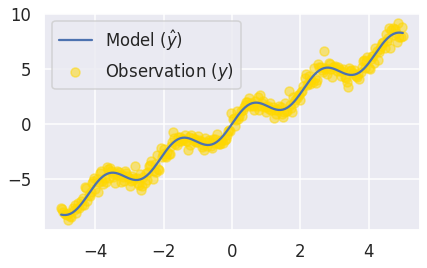

In [23]:
y_pred = sin_model(x, theta_est)

plt.plot(x, y_pred, label='Model ($\hat{y}$)')
plt.scatter(x, y, alpha=0.5, label='Observation ($y$)', color='gold')
plt.legend();

Run the following cell to see a plot of the loss values over each iteration of the following 3 variations of gradient descent: gradient descent with a static learning rate, gradient descent with a decaying learning rate, and stochastic gradient descent with a static learning rate.

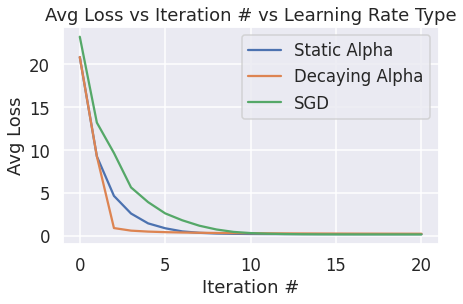

In [24]:
plt.plot(np.arange(len(loss)), loss, label='Static Alpha')
plt.plot(np.arange(len(loss)), loss_decay, label='Decaying Alpha')
plt.plot(np.arange(len(loss)), loss_stoch, label='SGD')
plt.xlabel('Iteration #')
plt.ylabel('Avg Loss')
plt.title('Avg Loss vs Iteration # vs Learning Rate Type')
plt.legend();

### Visualizing Loss
Let's visualize our loss functions and gain some insight as to how gradient descent optimizes our model parameters.

In the previous plot we saw the loss decrease with each iteration. In this part, we'll see the trajectory of the algorithm as it travels the loss surface? Run the following cells to see visualization of this trajectory. 

In [25]:
thetas = np.array(thetas).squeeze()
thetas_decay = np.array(thetas_decay).squeeze()
thetas_stoch = np.array(thetas_stoch).squeeze()
loss = np.array(loss)
loss_decay = np.array(loss_decay)
loss_stoch = np.array(loss_stoch)
thetas

array([[0.    , 0.    ],
       [2.6011, 2.6011],
       [0.9034, 2.591 ],
       [2.0563, 2.9631],
       [1.1589, 2.8669],
       [1.7939, 3.0728],
       [1.3216, 3.0015],
       [1.6495, 3.0291],
       [1.4233, 2.9882],
       [1.583 , 3.0103],
       [1.471 , 2.9893],
       [1.5504, 3.0017],
       [1.4944, 2.9914],
       [1.5342, 2.998 ],
       [1.506 , 2.9929],
       [1.526 , 2.9963],
       [1.5119, 2.9938],
       [1.5219, 2.9955],
       [1.5148, 2.9942],
       [1.5198, 2.9951],
       [1.5163, 2.9945]])

In [26]:
# Run me to see a 3D plot (gradient descent with static alpha)
plot_3d(thetas[:, 0], thetas[:, 1], loss, average_squared_loss, sin_model, x, y)

In [27]:
# Run me to see another 3D plot (gradient descent with decaying alpha)
plot_3d(thetas_decay[:, 0], thetas_decay[:, 1], loss_decay, average_squared_loss, sin_model, x, y)

In [28]:
# Run me to see another 3D plot (stochastic gradient descent)
plot_3d(thetas_stoch[:, 0], thetas_stoch[:, 1], loss_stoch, average_squared_loss, sin_model, x, y)

Another common way of visualizing 3D dynamics is with a _contour_ plot. Run the following cells.

In [29]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [30]:
def contour_plot(title, theta_history, loss_function, model, x, y):
    """
    The function takes the following as argument:
        theta_history: a (N, 2) array of theta history
        loss: a list or array of loss value
        loss_function: for example, l2_loss
        model: for example, sin_model
        x: the original x input
        y: the original y output
    """
    theta_1_series = theta_history[:,0] # a list or array of theta_1 value
    theta_2_series = theta_history[:,1] # a list or array of theta_2 value

    ## In the following block of code, we generate the z value
    ## across a 2D grid
    theta1_s = np.linspace(np.min(theta_1_series) - 0.1, np.max(theta_1_series) + 0.1)
    theta2_s = np.linspace(np.min(theta_2_series) - 0.1, np.max(theta_2_series) + 0.1)

    x_s, y_s = np.meshgrid(theta1_s, theta2_s)
    data = np.stack([x_s.flatten(), y_s.flatten()]).T
    ls = []
    for theta1, theta2 in data:
        l = loss_function(model(x, np.array([theta1, theta2])), y)
        ls.append(l)
    z = np.array(ls).reshape(50, 50)
    
    # Create trace of theta point
    # Create the contour 
    theta_points = go.Scatter(name="theta Values", 
                              x=theta_1_series, 
                              y=theta_2_series,
                              mode="lines+markers")
    lr_loss_contours = go.Contour(x=theta1_s, 
                                  y=theta2_s, 
                                  z=z, 
                                  colorscale='Viridis', reversescale=True)

    plotly.offline.iplot(go.Figure(data=[lr_loss_contours, theta_points], layout={'title': title}))

In [31]:
contour_plot('Gradient Descent with Static Learning Rate', thetas, average_squared_loss, sin_model, x, y)

In [32]:
contour_plot('Gradient Descent with Decay Learning Rate', thetas_decay, average_squared_loss, sin_model, x, y)

In [33]:
contour_plot('Stochastic Gradient Descent', thetas_stoch, average_squared_loss, sin_model, x, y)

<!-- BEGIN QUESTION -->

### Question 3d: Analyzing Learning Rates

In 1-2 sentences, describe what you notice about the path that $\theta$ takes with a static learning rate vs. a decaying learning rate and for batch vs. stochastic gradient descent. Based on these comparisons, why do we often prefer SGD over batch GD in practice? In your answer, refer to the plots above.

<!--
BEGIN QUESTION
name: q3d
manual: true
points: 2
-->

Theta takes a much more variant and sharp path with static learning rate than with decaying learning rate. It also seems that decaying learning rate can more quickly decrease loss. We prefer SGD over batch GD because SGD is easier to read.

<!-- END QUESTION -->



---

**Congrats, you've finished Homework 9!**

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [34]:
grader.check_all()

q1 results: All test cases passed!

q2 results: All test cases passed!

q3a results: All test cases passed!

q3b results: All test cases passed!

q8c results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [35]:
# Save your notebook first, then run this cell to export your submission.
grader.export()